In [139]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [215]:
df_rest = pd.read_csv('resting_face.csv', header=None)
df_rest_labelled = df_rest

df_rest_labelled['Output'] = False
df_rest_labelled.shape

(1421, 957)

In [216]:
df_twitch = pd.read_csv('twitch_face.csv', header=None)

df_twitch_labelled = df_twitch
df_twitch_labelled['Output'] = True
df_twitch_labelled.shape

(1085, 957)

In [217]:
df = pd.concat([df_rest_labelled, df_twitch_labelled])
df

,0,1,2,3,4,5,6,7,8,9,...,947,948,949,950,951,952,953,954,955,Output
0,0.509608,0.521873,0.507082,0.478729,0.507060,0.491467,0.499981,0.418324,0.507285,0.460943,...,0.370407,0.567204,0.371301,0.558372,0.356693,0.548622,0.369366,0.557517,0.383906,False
1,0.508774,0.521606,0.506633,0.479744,0.506432,0.493084,0.500060,0.419711,0.507020,0.461814,...,0.370707,0.566249,0.371840,0.557762,0.357156,0.548142,0.369398,0.556672,0.384097,False
2,0.509095,0.523473,0.507428,0.480177,0.507143,0.493330,0.500300,0.419571,0.507722,0.462239,...,0.370742,0.566855,0.371873,0.557751,0.356986,0.547768,0.369418,0.556934,0.384282,False
3,0.508793,0.524167,0.507529,0.480844,0.507161,0.494139,0.500385,0.419453,0.507859,0.462670,...,0.369282,0.567158,0.370818,0.557802,0.354613,0.547320,0.367596,0.556714,0.383833,False
4,0.509712,0.523688,0.508381,0.478873,0.507949,0.492566,0.500973,0.418296,0.508665,0.460726,...,0.370134,0.567428,0.371508,0.558054,0.355672,0.547585,0.368623,0.556993,0.384478,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,0.498592,0.515620,0.496695,0.467997,0.497151,0.486538,0.492010,0.414106,0.497137,0.450779,...,0.373586,0.557295,0.375185,0.549489,0.360587,0.540224,0.371983,0.548033,0.386560,True
1081,0.496642,0.515024,0.494755,0.467417,0.495375,0.485974,0.490683,0.413384,0.495280,0.450204,...,0.373613,0.557064,0.375439,0.549295,0.360452,0.539822,0.371805,0.547579,0.386769,True
1082,0.495402,0.515667,0.494049,0.465585,0.494627,0.484508,0.490314,0.411897,0.494677,0.448406,...,0.374195,0.557181,0.376259,0.549719,0.361219,0.540243,0.372155,0.547673,0.387193,True
1083,0.494601,0.514798,0.493828,0.465304,0.494427,0.484431,0.490274,0.411802,0.494485,0.448168,...,0.373919,0.557288,0.376187,0.549837,0.360610,0.540164,0.371587,0.547625,0.387218,True


In [218]:
X = df.drop('Output', axis=1).values
y = df['Output'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [219]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [220]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=956, out_features=500)
        self.fc2 = nn.Linear(in_features=500, out_features=500)
        self.fc3 = nn.Linear(in_features=500, out_features=100)
        self.output = nn.Linear(in_features=100, out_features=2)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output(x)
        return x

In [221]:
model = ANN()
model

ANN(
  (fc1): Linear(in_features=956, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=2, bias=True)
)

In [222]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [223]:
%%time

epochs = 400
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)
    
 
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.6895555853843689
Epoch: 10 Loss: 0.6829534769058228
Epoch: 20 Loss: 0.6817310452461243
Epoch: 30 Loss: 0.6797853708267212
Epoch: 40 Loss: 0.6762433648109436
Epoch: 50 Loss: 0.6695564389228821
Epoch: 60 Loss: 0.6562862396240234
Epoch: 70 Loss: 0.6337035894393921
Epoch: 80 Loss: 0.5946812629699707
Epoch: 90 Loss: 0.5536789298057556
Epoch: 100 Loss: 0.5088399052619934
Epoch: 110 Loss: 0.46184486150741577
Epoch: 120 Loss: 0.4043422341346741
Epoch: 130 Loss: 0.37215185165405273
Epoch: 140 Loss: 0.3145962655544281
Epoch: 150 Loss: 0.26666662096977234
Epoch: 160 Loss: 0.22357289493083954
Epoch: 170 Loss: 0.1871558129787445
Epoch: 180 Loss: 0.1557743102312088
Epoch: 190 Loss: 0.12956351041793823


KeyboardInterrupt: 

[0.6895555853843689, 0.6864142417907715, 0.6846754550933838, 0.6838064789772034, 0.6834905743598938, 0.6834987998008728, 0.6836008429527283, 0.6836280822753906, 0.683440089225769, 0.6832049489021301]


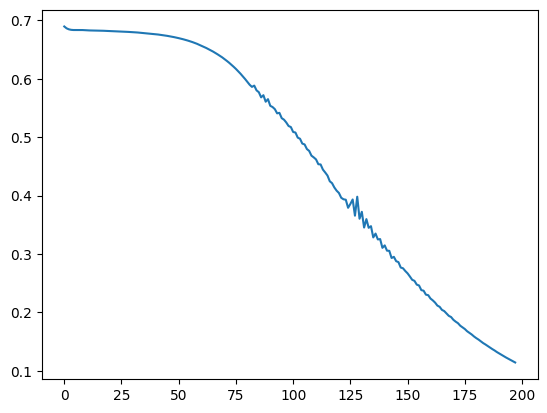

In [224]:
loss_arr = [loss.item() for loss in loss_arr]

print(loss_arr[:10])
plt.plot(loss_arr)

In [225]:
y_pred = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        y_pred.append(y_hat.argmax().item())

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       167

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



In [226]:
torch.save(model, "model.pth")